In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

Постройте модель, которая оценивает вероятность того, что в следующем году в африканской стране Kenya произойдет кризис на базе 6летней истории (наличие кризиса, информация о валюте и внешнем долге).

Сколько ввп в среднем у стран с наименьшим количеством кризисов в спокойные годы?

Сколько ввп в среднем у стран с наименьшим количеством кризисов в спокойные годы?


### Предподготовка

In [2]:
###Загрузим базу данных
data = pd.read_csv("african_crises.csv", index_col = 0)

In [3]:
###Выберем только Кению
data1 = data[data["country"] == "Kenya"]

In [4]:
###Упростим себе жизнь
c = "banking_crisis"
e = "exch_usd"
###Найдем, когда был и не был банковский кризис
y_raw = data1[c].values

In [5]:
###Перейдем от строк к цифрам
for i in range(len(y_raw)):
    if y_raw[i] == 'no_crisis': 
        y_raw[i] = 0
    elif y_raw[i] == "crisis":
        y_raw[i] = 1

In [6]:
###Получим значения для тренировки предсказания
n = 0
Z = []
M = []
while n != y_raw.shape[0]-6:
    M.append(y_raw[n+6])
    n += 1

In [7]:
M = np.array(M)

In [8]:
###Переходим к стоимости валюты относительно доллара
x_raw = data1[e].values

In [9]:
###Уменьшим значения до разброса от 0 до 1
for i in range(len(x_raw)):
    x_raw[i] = float(x_raw[i])
x_pre = x_raw/100

In [10]:
###Получим значения для тренировки предсказания
i = 0
X = []
Y = []
while i != x_pre.shape[0]-6:
    X.append(x_pre[i:i+6])
    i += 1

In [11]:
X = np.stack(X)

### Переход к тренировке

In [12]:
###Получаем линейную регрессию (строим модель)
xtr, xte, mtr, mte = train_test_split(X, M)


In [13]:
model1 = LinearRegression()

In [14]:
###Фитим модельку
model1.fit(xtr, mtr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
print("mse =", mean_squared_error(mte, model1.predict(xte)), 
      "mae = ", mean_absolute_error(mte, model1.predict(xte)))
###Среднеквадратичная ошибка дает, конечно, не сильно большую ошибку, хоть и существенную,
###а вот среднеабсолютная совсем улетает :(

mse = 0.05561227990006175 mae =  0.19657698409769497


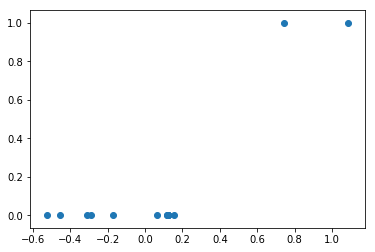

In [16]:
###Построим граф(конечно, с учетом того, что М принимает
###значение от 0 до 1, то это не совсем корректно), 
###хотя по значениям все достаточно близко к истине
plt.scatter(model1.predict(xte), mte)

In [17]:
X[-1]

array([0.77711111, 0.7582    , 0.80751944, 0.850681  , 0.860008  ,
       0.8631    ])

In [18]:
M[-1]

0

In [19]:
###А теперь предскажем
model1.predict([[0.77711111, 0.7582    , 0.80751944, 0.850681  , 0.860008  ,
       0.8631    ]])

array([-0.0814487])

In [28]:
###Таким образом, модель приблизительно оказывается права о том, что кризиса не будет

Можно считать эксперимент успешным! (нет)

Сколько ввп в среднем у стран с наименьшим количеством кризисов в спокойные годы?

In [21]:
###Создадим фрейм только с безкризисными годами для всех стран
data2 = data[data['banking_crisis'] == "no_crisis"]
###найдем все страны, у которых хотя бы раз не было кризиса
cat, cnt = np.unique(data2["country"].values, return_counts = True)

In [22]:
###теперь найдем 3 страны, которые были в безкризисном положении дольше всех
l = [int(cnt[i]) for i in range(len(cnt))]
m = l.index(max(l))
l[m] = 0
n = l.index(max(l))
l[n] = 0
o = l.index(max(l))
l[o] = 0

In [23]:
###получим данные для каждой отдельной страны
d1 = data[data["country"] == cat[m]]
d2 = data[data["country"] == cat[n]]
d3 = data[data["country"] == cat[o]]

In [24]:
###получим значения ввп
m1 = sum(d1["gdp_weighted_default"].values)
n1 = sum(d2["gdp_weighted_default"].values)
o1 = sum(d3["gdp_weighted_default"].values)

In [25]:
###получим общее количество лет для каждой страны
m2 = d1.shape[0]
n2 = d2.shape[0]
o2 = d3.shape[0]

In [26]:
###выведем ответ
print('in', cat[m], 'the average debt in default vis-a-vis the GDP is', m1/m2)
print('in', cat[n], 'the average debt in default vis-a-vis the GDP is', n1/n2)
print('in', cat[o], 'the average debt in default vis-a-vis the GDP is', o1/o2)

###P.S. не понял, что такое спокойные годы, поэтому посчитал за все,
###Все равно разница была бы небольшая

in Egypt the average debt in default vis-a-vis the GDP is 0.015483870967741935
in South Africa the average debt in default vis-a-vis the GDP is 0.015789473684210523
in Algeria the average debt in default vis-a-vis the GDP is 0.01623529411764706


### Заранее спасибо, что дошли до этого момента, а не поставли 1 из 10 :))))